# Treinamento e Análise

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.listdir('../01_Desenvolvimento_extracao/')
# ..= voltar 1 pasta
# . = daqui pra cá

['.ipynb_checkpoints',
 'Teste_Start_Game.ipynb',
 'dados.pkl',
 'Start_Game.ipynb']

In [3]:
df = pd.read_pickle('../01_Desenvolvimento_extracao/dados.pkl')

In [4]:
df.tail()

,1,2,3,4,5,6,7,8,9,resultado
11496,0.5,0.5,0,0.0,0,1,1,1,1,0
11497,0,0.5,1,1.0,0,0,1,1,0,1
11498,0,0.5,1,1.0,1,1,0.5,0,0,0
11499,1,0,0,1.0,1,0,1,0,1,0
11500,1,0,1,0.0,0,1,0.5,0.5,1,0


In [5]:
# Remover dados duplicados + resertar indice + dropar coluna index
df = df.drop_duplicates().reset_index().drop('index',axis=1)
df.tail()

,1,2,3,4,5,6,7,8,9,resultado
944,0.5,1,0,1.0,1,1,0,0.5,0,0
945,0,0.5,1,0.0,0.5,1,1,0,1,0
946,0.5,0.5,0,1.0,0,0,1,1,1,0
947,1,0,0.5,1.0,1,0,0,0.5,1,0
948,0,1,0.5,1.0,1,1,0.5,0,0,0


# Separação dos dados

In [6]:
x = df.drop('resultado',axis=1)
y = df[['resultado']]

x.shape,y.shape

((949, 9), (949, 1))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
)

In [9]:
# RESETAR OS índices, para igualar os valores corretos de X e Y
x_train.reset_index().drop('index',axis=1)
y_train.reset_index().drop('index',axis=1)

x_test.reset_index().drop('index',axis=1)
y_test.reset_index().drop('index',axis=1)


# não sei porquê, tive que fazer essa conversão para
# o modelo ser aceito... nunca aconteceu isso antes
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [10]:
import tensorflow as tf

In [58]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    input_shape = (x_train.shape[1],)
))


model.add(tf.keras.layers.Dense(
    units = 20,
    activation = 'relu',
))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(
    units = 20,
    activation = 'relu',
))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(
    units = 20,
    activation = 'relu',
))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(
    units = 20,
    activation = 'relu',
))

model.add(tf.keras.layers.Dense(
    units = 20,
    activation = 'relu',
    
))

model.add(tf.keras.layers.Dense(
    units = 20,
    activation = 'relu',
    
))


model.add(tf.keras.layers.Dense(
    units = 1,
    activation = 'sigmoid',
))

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_79 (Dense)             (None, 20)                220       
_________________________________________________________________
dropout_30 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_80 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_31 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_32 (Dropout)         (None, 20)              

### LOAD

In [59]:
model.load_weights('./weight_01.h5')

In [60]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    epochs = 200
)

history.history.keys()

Train on 597 samples, validate on 67 samples
Epoch 1/200
597/597 [==============================] - 1s 1ms/sample - loss: 0.0258 - accuracy: 0.9832 - val_loss: 0.3957 - val_accuracy: 0.9552
Epoch 2/200
597/597 [==============================] - 0s 140us/sample - loss: 0.0436 - accuracy: 0.9799 - val_loss: 0.3507 - val_accuracy: 0.9403
Epoch 3/200
597/597 [==============================] - 0s 154us/sample - loss: 0.0182 - accuracy: 0.9832 - val_loss: 0.2770 - val_accuracy: 0.9403
Epoch 4/200
597/597 [==============================] - 0s 101us/sample - loss: 0.0334 - accuracy: 0.9832 - val_loss: 0.3177 - val_accuracy: 0.9403
Epoch 5/200
597/597 [==============================] - 0s 134us/sample - loss: 0.0250 - accuracy: 0.9799 - val_loss: 0.3152 - val_accuracy: 0.9403
Epoch 6/200
597/597 [==============================] - 0s 151us/sample - loss: 0.0166 - accuracy: 0.9849 - val_loss: 0.3055 - val_accuracy: 0.9403
Epoch 7/200
597/597 [==============================] - 0s 108us/sample - lo

597/597 [==============================] - 0s 104us/sample - loss: 0.0185 - accuracy: 0.9832 - val_loss: 0.3605 - val_accuracy: 0.9254
Epoch 57/200
597/597 [==============================] - 0s 102us/sample - loss: 0.0282 - accuracy: 0.9832 - val_loss: 0.3311 - val_accuracy: 0.9403
Epoch 58/200
597/597 [==============================] - 0s 95us/sample - loss: 0.0222 - accuracy: 0.9816 - val_loss: 0.2768 - val_accuracy: 0.9403
Epoch 59/200
597/597 [==============================] - 0s 100us/sample - loss: 0.0175 - accuracy: 0.9849 - val_loss: 0.3062 - val_accuracy: 0.9403
Epoch 60/200
597/597 [==============================] - 0s 110us/sample - loss: 0.0174 - accuracy: 0.9816 - val_loss: 0.3326 - val_accuracy: 0.9403
Epoch 61/200
597/597 [==============================] - 0s 127us/sample - loss: 0.0211 - accuracy: 0.9832 - val_loss: 0.3747 - val_accuracy: 0.9403
Epoch 62/200
597/597 [==============================] - 0s 105us/sample - loss: 0.0224 - accuracy: 0.9816 - val_loss: 0.3658 -

597/597 [==============================] - 0s 99us/sample - loss: 0.0179 - accuracy: 0.9816 - val_loss: 0.5049 - val_accuracy: 0.9403
Epoch 112/200
597/597 [==============================] - 0s 108us/sample - loss: 0.0183 - accuracy: 0.9849 - val_loss: 0.4538 - val_accuracy: 0.9403
Epoch 113/200
597/597 [==============================] - 0s 103us/sample - loss: 0.0182 - accuracy: 0.9832 - val_loss: 0.5111 - val_accuracy: 0.9254
Epoch 114/200
597/597 [==============================] - 0s 103us/sample - loss: 0.0147 - accuracy: 0.9849 - val_loss: 0.3837 - val_accuracy: 0.9403
Epoch 115/200
597/597 [==============================] - 0s 116us/sample - loss: 0.0219 - accuracy: 0.9849 - val_loss: 0.3752 - val_accuracy: 0.9552
Epoch 116/200
597/597 [==============================] - 0s 106us/sample - loss: 0.0155 - accuracy: 0.9849 - val_loss: 0.4036 - val_accuracy: 0.9403
Epoch 117/200
597/597 [==============================] - 0s 102us/sample - loss: 0.0250 - accuracy: 0.9832 - val_loss: 0.

597/597 [==============================] - 0s 109us/sample - loss: 0.0159 - accuracy: 0.9849 - val_loss: 0.2937 - val_accuracy: 0.9403
Epoch 167/200
597/597 [==============================] - 0s 107us/sample - loss: 0.0188 - accuracy: 0.9849 - val_loss: 0.3218 - val_accuracy: 0.9254
Epoch 168/200
597/597 [==============================] - 0s 116us/sample - loss: 0.0205 - accuracy: 0.9849 - val_loss: 0.3666 - val_accuracy: 0.9552
Epoch 169/200
597/597 [==============================] - 0s 104us/sample - loss: 0.0261 - accuracy: 0.9832 - val_loss: 0.5166 - val_accuracy: 0.9403
Epoch 170/200
597/597 [==============================] - 0s 102us/sample - loss: 0.0228 - accuracy: 0.9799 - val_loss: 0.2777 - val_accuracy: 0.9552
Epoch 171/200
597/597 [==============================] - 0s 108us/sample - loss: 0.0180 - accuracy: 0.9849 - val_loss: 0.2828 - val_accuracy: 0.9552
Epoch 172/200
597/597 [==============================] - 0s 100us/sample - loss: 0.0220 - accuracy: 0.9849 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

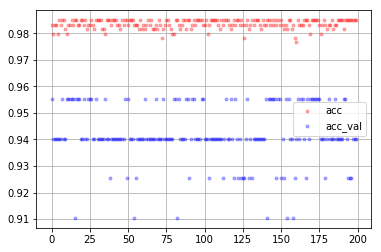

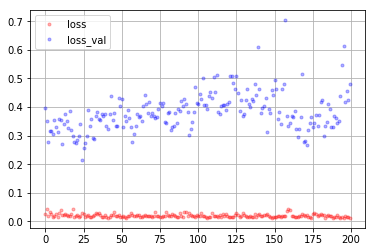

In [61]:
plt.figure()
plt.plot(history.history['accuracy'],'.r', label = 'acc',alpha = 0.3)
plt.plot(history.history['val_accuracy'], '.b', label = 'acc_val',alpha = 0.3)
plt.legend()
plt.grid()

plt.figure()
plt.plot(history.history['loss'],'.r', label = 'loss',alpha = 0.3)
plt.plot(history.history['val_loss'],'.b', label = 'loss_val',alpha = 0.3)
plt.legend()
plt.grid()

# Predicts

In [62]:
pred = model.predict(x_test)

In [63]:
pred_df = pd.DataFrame()
pred_df['pred'] = pred[:,0]
pred_df['y'] = y_test

In [64]:
pred_df.head()

,pred,y
0,6.882063e-07,0.0
1,1.000000e+00,1.0
2,1.000000e+00,1.0
3,8.124176e-07,0.0
4,6.137314e-17,0.0


In [65]:
def f(x):
    val = x[0]
    if val >= 0.75:
        return 1
    if 0.25 < val and val < 0.75:
        return 0.5
    if val <= 0.25:
        return 0

In [66]:
pred_df['pred'] = pred_df[['pred']].apply(f,axis=1)

In [67]:
k = 0
total = len(pred_df['pred'])

for pred,y in zip(pred_df['pred'],y_test[:,0]):
    if pred == y:
        k = k+1
p = k/total
print(f"Porcentagem de Acerto {np.around(p*100,2)}%")

Porcentagem de Acerto 96.49%


# Save

In [68]:
model.save_weights('./weight_01.h5')